In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
column_names=['user_id','item_id','rating','timestamp']

In [3]:
df=pd.read_csv('u.data',sep='\t',names=column_names)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_title=pd.read_csv('Movie_Id_Titles')

In [6]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df=pd.merge(df,movie_title,on='item_id') #merging the two dataframes

In [8]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [9]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head() #sorting Movie titles with descending mean ratings 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head() #counting the ratings for each title- 
# in descending order

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [11]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean()) #Creating a data frame of mean ratings for movie titles

In [12]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
ratings['number of rating']=pd.DataFrame(df.groupby('title')['rating'].count()) #making a number of ratings column

In [14]:
ratings.head()

,rating,number of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


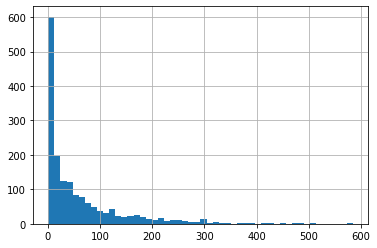

In [15]:
ratings['number of rating'].hist(bins=50) # variation of ratings. There are movies with #of rating as 600. These are 
# probably the famous movies

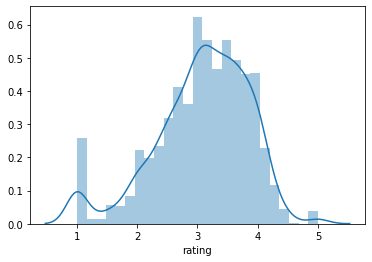

In [16]:
sns.distplot(ratings['rating']) #variation of ratings. Seems like peak is around 3. So most movies are around 3

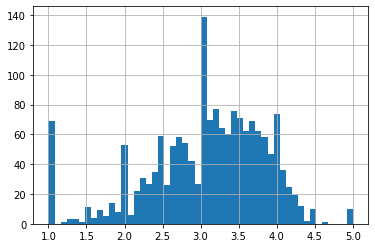

In [17]:
ratings['rating'].hist(bins=50) #closer look shows the similar pattern

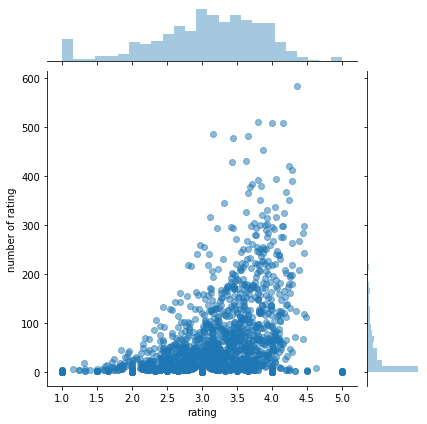

In [18]:
sns.jointplot(x='rating',y='number of rating',data=ratings,alpha=0.5)# basically popular movies are between 2.5 to 4

In [19]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [20]:
moviemat=df.pivot_table(values='rating',index='user_id',columns='title') # creating title wise table with "rating" as 
#content to see 

In [21]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ratings.sort_values(by='number of rating',ascending=False).head() #sorting or ratings

,rating,number of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [23]:
starwars_user_rating=moviemat['Star Wars (1977)'] #taking two specific movie's ratings from the matrix of ID v/s titles
Liarliar_user_rating=moviemat['Liar Liar (1997)']

In [24]:
starwars_user_rating.head() # each users rating for this particular movie

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [39]:
similar_to_starwars=moviemat.corrwith(starwars_user_rating) #Finding corelation with overall matrix of user_ID v/s titles

C:\Users\rakshit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\rakshit\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [26]:
similar_to_starwars.head() #This corelation helps in understanding what other movie rating is more related 
#to the particular movie which we found corelation with

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [40]:
similar_to_Liarliar=moviemat.corrwith(Liarliar_user_rating) #Again finding corelation of another movie with the 
#whole User_Id v/s titles matrix

In [28]:
similar_to_Liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [29]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Corelation']) #converting to df 
corr_starwars.dropna(inplace=True)

In [30]:
corr_starwars.sort_values('Corelation',ascending=False).head()

,Corelation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [31]:
corr_starwars=corr_starwars.join(ratings['number of rating'])

In [32]:
corr_starwars.head()

,Corelation,number of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [33]:
corr_starwars[corr_starwars['number of rating']>100].sort_values('Corelation',ascending=False).head() #Computing similar 
#movies with higher number of ratings!
#Hence people who liked star wars will like the other movies with positive corelation.

,Corelation,number of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [34]:
corr_Liarliar=pd.DataFrame(similar_to_Liarliar,columns=['Corelation'])
corr_Liarliar.dropna(inplace=True)

In [35]:
corr_Liarliar.head() 

,Corelation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739


In [36]:
corr_Liarliar=corr_Liarliar.join(ratings['number of rating'])

In [37]:
corr_Liarliar.head()

,Corelation,number of rating
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93


In [38]:
corr_Liarliar[corr_Liarliar['number of rating']>100].sort_values('Corelation',ascending=False).head()

,Corelation,number of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
